In [3]:
from cdFBA.processes.dfba import *
import pprint

from cdFBA.utils import DFBAconfig, model_from_file
import cobra

from process_bigraph.composite import ProcessTypes
from process_bigraph import Composite

from cdFBA import register_types

from matplotlib import pyplot as plt

In [2]:
def run_environment(core):
    """This tests that the environment runs"""
    name1 = "E.coli"
    name2 = "S.flexneri"
    volume = 2
    # define a single dFBA model
    spec = {
        "dfba": get_single_dfba_spec(model_file= "iAF1260", name=name1)
    }

    spec["dfba2"] = get_single_dfba_spec(model_file = "iSFxv_1172", name=name2)

    spec['shared environment'] = initial_environment(volume=volume, species_list=[name1, name2])

    spec['dFBA Results'] = {name1:
        {
            "glucose": 0,
            "acetate": 0,
            spec['dfba']['config']['name']: 0,
        },
        name2:
        {
            "glucose": 0,
            "acetate": 0,
            spec['dfba2']['config']['name']: 0,
        }
    }

    spec['update environment'] = environment_spec()

    pprint.pprint(spec)

    # put it in a composite
    sim = Composite({
        "state": spec,
        "emitter": {'mode': 'all'}},
        core=core
    )

    # run the simulation
    sim.run(40)

    # get the results
    results = sim.gather_results()[('emitter',)]

    timepoints = []
    for timepoint in results:
        time = timepoint.pop('global_time')
        timepoints.append(time)
        dfba_spec = timepoint.pop('dfba')

    env = [timepoint['shared environment']['concentrations'] for timepoint in results]
    env_combined = {}
    for d in env:
        for key, value in d.items():
            if key not in env_combined:
                env_combined[key] = []
            env_combined[key].append(value)


    fig, ax = plt.subplots(dpi=100)
    for key, value in env_combined.items():
        ax.plot(timepoints, env_combined[key], label=key)
    plt.xlabel('Time')
    plt.ylabel('Substrate Concentration')
    plt.legend()
    plt.tight_layout()
    plt.show()

{'dFBA Results': {'E.coli': {'E.coli': 0, 'acetate': 0, 'glucose': 0},
                  'S.flexneri': {'S.flexneri': 0, 'acetate': 0, 'glucose': 0}},
 'dfba': {'_type': 'process',
          'address': 'local:DFBA',
          'config': {'biomass_identifier': 'BIOMASS_Ec_iAF1260_core_59p81M',
                     'bounds': {'ATPM': {'lower': 1, 'upper': 1},
                                'EX_o2_e': {'lower': -2, 'upper': None}},
                     'kinetics': {'acetate': (0.5, 7), 'glucose': (0.02, 15)},
                     'model_file': 'iAF1260',
                     'name': 'E.coli',
                     'reaction_map': {'acetate': 'EX_ac_e',
                                      'glucose': 'EX_glc__D_e'},
                     'time_step': 0.1},
          'inputs': {'current_update': ['dFBA Results'],
                     'shared_environment': ['shared environment']},
          'outputs': {'dfba_update': ['dFBA Results', 'E.coli']}},
 'dfba2': {'_type': 'process',
           'add

/opt/anaconda3/envs/fbapractice/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


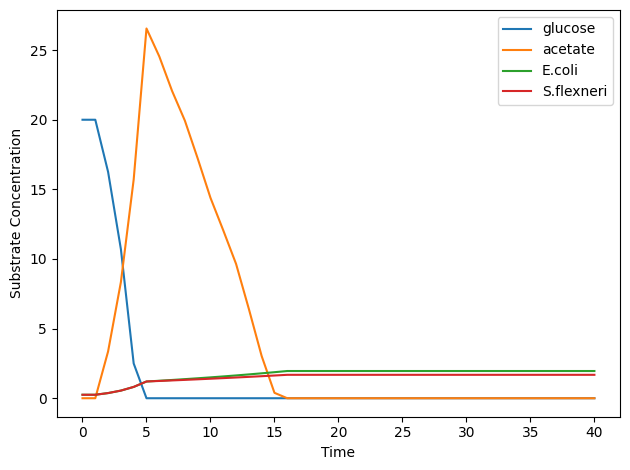

In [3]:
# create a core
core = ProcessTypes()
core = register_types(core)

core.register_process('DFBA', DFBA)
core.register_process('UpdateEnvironment', UpdateEnvironment)

run_environment(core)

In [50]:
model = model_from_file('/Users/tasnifrahman/Research/ecolicommunity/Klebsiella_pneumoniae_subsp_pneumoniae_KPNIH5_p.xml')

In [5]:
model2 = cobra.io.load_model('iAF1260')

In [37]:
[matabolite.name for matabolite in model2.metabolites]


['2-Acyl-sn-glycero-3-phosphoglycerol (n-C16:1)',
 '2-Acyl-sn-glycero-3-phosphoglycerol (n-C16:1)',
 '2-Acyl-sn-glycero-3-phosphoglycerol (n-C18:0)',
 '2-Acyl-sn-glycero-3-phosphoglycerol (n-C18:0)',
 '2-Acyl-sn-glycero-3-phosphoglycerol (n-C18:1)',
 '2-Acyl-sn-glycero-3-phosphoglycerol (n-C18:1)',
 '(S)-2-Aceto-2-hydroxybutanoate',
 '2-Aminomalonate semialdehyde',
 'L-2-Amino-3-oxobutanoate',
 '1-(2-Carboxyphenylamino)-1-deoxy-D-ribulose 5-phosphate',
 '2-Dehydro-3-deoxy-D-arabino-heptonate 7-phosphate',
 '2-dodecanoyl-sn-glycerol 3-phosphate',
 '2-dodecanoyl-sn-glycerol 3-phosphate',
 '2-Dehydro-3-deoxy-D-gluconate 6-phosphate',
 '2-Dehydro-3-deoxy-D-gluconate',
 '2-Dehydro-3-deoxy-D-gluconate',
 '2-Dehydro-3-deoxy-D-gluconate',
 '2-Dehydro-3-deoxy-D-galactonate 6-phosphate',
 '2-Dehydro-3-deoxy-D-galactonate',
 '2-Dehydro-D-gluconate',
 '1,2-Diacyl-sn-glycerol (dioctadec-11-enoyl, n-C18:1)',
 '10-Formyltetrahydrofolate',
 '2-Dehydro-L-gulonate',
 '1,2-Diacyl-sn-glycerol (didodecanoy

In [23]:
model2.exchanges[150].annotation

{'sbo': 'SBO:0000627',
 'bigg.reaction': 'EX_no3_e',
 'metanetx.reaction': 'MNXR101992',
 'rhea': ['34924', '34926', '34923', '34925'],
 'seed.reaction': ['rxn09005', 'rxn10935']}

In [ ]:
model.exchanges

In [4]:
getattr(model.exchanges, 'EX_cgly(e)').metabolites

{<Metabolite cgly[e] at 0x310f0e0d0>: -1.0}

In [5]:
config = DFBAconfig(model, medium_type='exchange')

234 234


In [6]:
config.reaction_map

{'(S)-Propane-1,2-diol': 'EX_12ppd_S(e)',
 '1,3-Propanediol': 'EX_13ppd(e)',
 '1,5-Diaminopentane': 'EX_15dap(e)',
 '2-Demethylmenaquinone 8': 'EX_2dmmq8(e)',
 '2-Hydroxyphenylacetate': 'EX_2hyoxplac(e)',
 '(3,4-dihydroxyphenyl)acetate': 'EX_34dhpha(e)',
 '3,4-Dihydroxy-L-phenylalanine': 'EX_34dhphe(e)',
 '3-Hydroxyphenylacetate': 'EX_3hphac(e)',
 '4-Aminobutanoate': 'EX_4abut(e)',
 '4-Hydroxyphenylacetaldehyde': 'EX_4hoxpacd(e)',
 '5-Aminosalicylic Acid (Mesalamine)': 'EX_5asa(e)',
 '5-Fluorouracil': 'EX_5fura(e)',
 '7-Aminoclonazepam': 'EX_7a_czp(e)',
 'chenodeoxycholate': 'EX_C02528(e)',
 'L-cysteate': 'EX_Lcyst(e)',
 'L-Arabinitol': 'EX_abt(e)',
 'Acetate': 'EX_ac(e)',
 'N-Acetyl-5-Aminosalicylic Acid': 'EX_ac5asa(e)',
 'Acetaldehyde': 'EX_acald(e)',
 'N-Acetyl-D-glucosamine': 'EX_acgam(e)',
 'N-Acetylisoniazid': 'EX_acisnzd(e)',
 'R Acetoin': 'EX_actn_R(e)',
 'Adenosine': 'EX_adn(e)',
 'Adenosylcobalamin': 'EX_adocbl(e)',
 '2-Oxoglutarate': 'EX_akg(e)',
 'D-Alanine': 'EX_ala_D(e)'

In [8]:
import libsbml
import model_polisher as mp

In [9]:
model_file = '/Users/tasnifrahman/Research/ecolicommunity/agora2/Klebsiella_pneumoniae_subsp_pneumoniae_KPNIH5.xml'

config = {"annotation": {"bigg": {"annotate-with-bigg": "true"},
                         "annotatedb": {"annotate-with-adb": "true"}}}

result = mp.polish_model_file(model_file, config)

In [11]:
result['post_validation']

[]

In [12]:
libsbml.writeSBML(result['polished_document'], '/Users/tasnifrahman/Research/ecolicommunity/Klebsiella_pneumoniae_subsp_pneumoniae_KPNIH5_p.xml')

1

In [27]:
model.metabolites

[<Metabolite 10dmthmcn[c] at 0x17eb43a00>,
 <Metabolite 10fthf5glu[c] at 0x17c2bd0a0>,
 <Metabolite 10fthf[c] at 0x17c2bd6a0>,
 <Metabolite 10m3hddcaACP[c] at 0x17c2bd580>,
 <Metabolite 10m3hundecACP[c] at 0x17c2bdee0>,
 <Metabolite 10m3oddcaACP[c] at 0x17c2bd0d0>,
 <Metabolite 10m3oundecACP[c] at 0x17c2bdb50>,
 <Metabolite 10mddcaACP[c] at 0x17c2bd4c0>,
 <Metabolite 10mtddec2eACP[c] at 0x17c2bd880>,
 <Metabolite 10mtundec2eACP[c] at 0x17c2bd400>,
 <Metabolite 10mundecACP[c] at 0x17c2bd670>,
 <Metabolite 11docrtstrn[c] at 0x17c2bd610>,
 <Metabolite 11m3hddcaACP[c] at 0x17c2bd8e0>,
 <Metabolite 11m3oddcaACP[c] at 0x17c2bdeb0>,
 <Metabolite 11mddcaACP[c] at 0x17c2bdcd0>,
 <Metabolite 11mtddec2eACP[c] at 0x17c2bd370>,
 <Metabolite 12d4mch35d1c[c] at 0x17c2bdd60>,
 <Metabolite 12daihdglyc[c] at 0x17c2bd310>,
 <Metabolite 12daipdglyc[c] at 0x17c2bd7f0>,
 <Metabolite 12dgr120[c] at 0x17c2bd5b0>,
 <Metabolite 12dgr140[c] at 0x17c2bd130>,
 <Metabolite 12dgr141[c] at 0x17c2bdc40>,
 <Metabolite 

In [42]:
len(list(model.exchanges))

235

In [43]:
import pprint

In [57]:
pprint.pprint(sorted([list(exchanges.metabolites)[0].name for exchanges in model2.exchanges]))

['(O16 antigen)x4 core oligosaccharide lipid A',
 '(R)-Glycerate',
 '(R)-Pantothenate',
 '(R)-Propane-1,2-diol',
 '(S)-Propane-1,2-diol',
 '(enterobacterial common antigen)x4 core oligosaccharide lipid A',
 '1,4-alpha-D-glucan',
 '1,5-Diaminopentane',
 "2',3'-Cyclic AMP",
 "2',3'-Cyclic CMP",
 "2',3'-Cyclic GMP",
 "2',3'-Cyclic UMP",
 '2(alpha-D-Mannosyl)-D-glycerate',
 '2,3-diaminopropionate',
 '2-Dehydro-3-deoxy-D-gluconate',
 '2-Oxoglutarate',
 '3  AMP C10H12N5O7P',
 '3  CMP C9H12N3O8P',
 '3  UMP C9H11N2O9P',
 '3,4-Dihydroxyphenylacetaldehyde',
 '3-(3-hydroxy-phenyl)propionate',
 '3-hydroxycinnamic acid',
 '4-Amino-4-deoxy-L-arabinose modified core oligosaccharide lipid A',
 '4-Aminobutanoate',
 '4-Hydroxyphenylacetaldehyde',
 '5-Dehydro-D-gluconate',
 'AMP C10H12N5O7P',
 'Acetaldehyde',
 'Acetate',
 'Acetoacetate',
 'Adenine',
 'Adenosine',
 'Adenosylcobalamin',
 'Aerobactin',
 'Aerobactin minus Fe3',
 'Agmatine',
 'Allantoin',
 'Alpha-D-Galactose 1-phosphate',
 'Alpha-D-Ribose 5-p

In [58]:
substrates2_ = sorted([list(exchanges.metabolites)[0].name for exchanges in model.exchanges])
substrates2 = [substrate.capitalize() for substrate in substrates2_]


In [59]:
substrates2

['(3,4-dihydroxyphenyl)acetate',
 '(4-hydroxyphenyl)acetaldehyde',
 '(r)-3-hydroxybutyrate',
 '(r)-acetoin',
 '(r)-pantothenate',
 '(s)-propane-1,2-diol',
 '1,5-diaminopentane',
 '2,2-difluorodeoxyuridine',
 '2,3-dihydroxicinnamic acid',
 '2-demethylmenaquinone 8',
 '2-hydroxyphenylacetate',
 '2-oxoglutarate',
 '2-deoxy-d-ribose',
 '2-deoxyadenosine',
 '3-(2,3-dihydroxyphenyl)propanoate',
 '3-(n-morpholino)propanesulfonic acid',
 '3-hydroxyphenylacetate',
 '4-aminobutanoate',
 '5-aminosalicylic acid (mesalamine)',
 '5-fluorocytosine',
 '5-fluorouracil',
 '7-amino nitrozepam',
 '7-aminoclonazepam',
 'Acetaldehyde',
 'Acetate',
 'Adenosine',
 'Adenosylcobalamin',
 'Allantoin',
 'Ammonium',
 'Arabinotriose',
 'Arbutin',
 'Benzamide',
 'Cadmium',
 'Carbon dioxide',
 'Chloramphenicol',
 'Chloride',
 'Cholate',
 'Choline',
 'Citrate',
 'Clonazepam',
 'Co2+',
 'Cob(i)alamin',
 'Cob(ii)alamin',
 'Cu2+',
 'Cytidine',
 'D-fructose',
 'D-galactarate',
 'D-galactonate',
 'D-galactose',
 'D-galactu

In [60]:
substrates2_

['(3,4-dihydroxyphenyl)acetate',
 '(4-hydroxyphenyl)acetaldehyde',
 '(R)-3-hydroxybutyrate',
 '(R)-Acetoin',
 '(R)-Pantothenate',
 '(S)-propane-1,2-diol',
 '1,5-Diaminopentane',
 '2,2-Difluorodeoxyuridine',
 '2,3-dihydroxicinnamic acid',
 '2-Demethylmenaquinone 8',
 '2-Hydroxyphenylacetate',
 '2-Oxoglutarate',
 '2-deoxy-D-ribose',
 '2-deoxyadenosine',
 '3-(2,3-Dihydroxyphenyl)propanoate',
 '3-(n-Morpholino)Propanesulfonic Acid',
 '3-Hydroxyphenylacetate',
 '4-Aminobutanoate',
 '5-Aminosalicylic Acid (Mesalamine)',
 '5-Fluorocytosine',
 '5-Fluorouracil',
 '7-Amino Nitrozepam',
 '7-Aminoclonazepam',
 'Acetaldehyde',
 'Acetate',
 'Adenosine',
 'Adenosylcobalamin',
 'Allantoin',
 'Ammonium',
 'Arabinotriose',
 'Arbutin',
 'Benzamide',
 'Cadmium',
 'Carbon dioxide',
 'Chloramphenicol',
 'Chloride',
 'Cholate',
 'Choline',
 'Citrate',
 'Clonazepam',
 'Co2+',
 'Cob(I)alamin',
 'Cob(II)alamin',
 'Cu2+',
 'Cytidine',
 'D-Fructose',
 'D-Galactarate',
 'D-Galactonate',
 'D-Galactose',
 'D-Galactu